<a href="https://colab.research.google.com/github/Kathi3/INDEPENDENT-PROJECT/blob/main/Moringa_Data_Science_Prep_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the SQL extension to the environment
#Connecting SQl lite memory database
%load_ext sql
%sql sqlite://

'Connected: @None'

## **IMPORTING LIBRARIES**


In [ ]:
#importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **DATASET LOADING**


DATA LOADING ALSO DONE IN TABLEAU

In [ ]:
#Importing the Karamoja datasets

population_df=pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
population_df.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
population_df=pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
population_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


## **SAVING DATASETS IN SQL DATAFRAME**

The table named Uganda_Karamoja_District crop yield population, IS HEREBY KNOWN AS **X** (IN SHORT) in our Database

In [ ]:
#Uploading the Uganda_Karamoja_District crop yield Dataset to SQL dataframe
#Droping any exsiting table named Uganda_Karamoja_District crop yield population, HEREBY KNOWN AS X (IN SHORT) in our Database
#Previewing the Table

with open('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv','r') as f:
    X = pd.read_csv(f, index_col=0, encoding='utf-8')
%sql DROP TABLE if EXISTS X;
%sql PERSIST X;
%sql SELECT * FROM X LIMIT 5;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.4238600000003,2733.6610140000003,609552,3545558
20,KAABONG,627057,7373606003,279,945,28121.67253,20544.19496,7394.4163340000005,5731830,6987723
85,KOTIDO,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
5,MOROTO,127811,3570160948,128,355,5954.814047999999,4741.748775999999,1190.050606,606944,422468


The table named Uganda_Karamoja_Subcountry crop yield population HEREBY KNOWN AS **Y** (IN SHORT) in our Database

In [ ]:
#Uploading the Uganda_Karamoja_Subcountry crop yield Dataset to SQL dataframe
#Droping any exsiting table named Uganda_Karamoja_Subcountry crop yield population HEREBY KNOWN AS Y (IN SHORT) in our Database
#Previewing the Table

with open('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv','r') as f:
    Y = pd.read_csv(f, index_col=0, encoding='utf-8')
%sql DROP TABLE if EXISTS Y;
%sql PERSIST Y;
%sql SELECT * FROM Y LIMIT 5;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
263,KACHERI,KOTIDO,17244,1067176155,Y,354.20741069999997,1137.467019,7023.533691,6434.342449,528.1242294,2279091.779,600723.8929
264,KOTIDO,KOTIDO,52771,597575188,Y,367.89052319999996,1162.9966869999998,13587.990759999999,12455.59264,824.7670809,4582294.492,959201.3825
265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.3141771,1167.005832,1656.5318550000002,1520.322052,8.561643817,561476.4874,9991.488268000001
266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.3245689,852.3665784,7087.823334000001,6761.488901000001,45.72171184,1915695.928,38971.65908
267,PANYANGARA,KOTIDO,65704,880955930,Y,373.8369255,1283.859882,10398.24939,10111.198129999999,172.6119139,3779939.224,221609.5114


##** DATA UNDERSTANDING**

In [ ]:
# Getting to know more about the X data-set.
#Like the data-types currently in use escpecially in an event we need to convert the data formats.
X.columns.values

array(['NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha',
       'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'], dtype=object)

In [ ]:
# Getting to know more about the X data-set.
#Like the data-types currently in use escpecially in an event we need to convert the data formats.
Y.columns.values

array(['SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area', 'Karamoja',
       'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'], dtype=object)

In [ ]:
#checking null values and data-info in X dataset

print("DATASET TRES INFRORMATION")
print(X.info())
print(" DATASET TRES Descriptive Statistics")
print(X.describe())
print("DATABASE TRES Null Value")
print(X.isnull().sum())

DATASET TRES INFRORMATION
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 92 to 80
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          7 non-null      object 
 1   POP           7 non-null      int64  
 2   Area          7 non-null      int64  
 3   S_Yield_Ha    7 non-null      int64  
 4   M_Yield_Ha    7 non-null      int64  
 5   Crop_Area_Ha  7 non-null      float64
 6   S_Area_Ha     7 non-null      float64
 7   M_Area_Ha     7 non-null      float64
 8   S_Prod_Tot    7 non-null      int64  
 9   M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 616.0+ bytes
None
 DATASET TRES Descriptive Statistics
                 POP          Area  ...    S_Prod_Tot    M_Prod_Tot
count       7.000000  7.000000e+00  ...  7.000000e+00  7.000000e+00
mean   214943.571429  3.960853e+09  ...  4.873098e+06  4.085632e+06
std    188604.280916  1.781860e+09  ...  5

In [ ]:
#checking null values and data-info in Y dataset

print("DATASET TRES INFRORMATION")
print(Y.info())
print(" DATASET TRES Descriptive Statistics")
print(Y.describe())
print("DATABASE TRES Null Value")
print(Y.isnull().sum())

DATASET TRES INFRORMATION
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 263 to 1320
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBCOUNTY_NAME  52 non-null     object 
 1   DISTRICT_NAME   52 non-null     object 
 2   POP             52 non-null     int64  
 3   Area            52 non-null     int64  
 4   Karamoja        52 non-null     object 
 5   S_Yield_Ha      52 non-null     float64
 6   M_Yield_Ha      52 non-null     float64
 7   Crop_Area_Ha    52 non-null     float64
 8   S_Area_Ha       52 non-null     float64
 9   M_Area_Ha       52 non-null     float64
 10  S_Prod_Tot      52 non-null     float64
 11  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB
None
 DATASET TRES Descriptive Statistics
                 POP          Area  ...    S_Prod_Tot    M_Prod_Tot
count      52.000000  5.200000e+01  ...  5.200000e+01  5.200000e+

In [ ]:
%%sql
PRAGMA table_info(X);

 * sqlite://
Done.


cid,name,type,notnull,dflt_value,pk
0,OBJECTID,BIGINT,0,None,0
1,NAME,TEXT,0,None,0
2,POP,BIGINT,0,None,0
3,Area,BIGINT,0,None,0
4,S_Yield_Ha,BIGINT,0,None,0
5,M_Yield_Ha,BIGINT,0,None,0
6,Crop_Area_Ha,FLOAT,0,None,0
7,S_Area_Ha,FLOAT,0,None,0
8,M_Area_Ha,FLOAT,0,None,0
9,S_Prod_Tot,BIGINT,0,None,0


In [ ]:
%%sql
PRAGMA table_info(Y);

 * sqlite://
Done.


cid,name,type,notnull,dflt_value,pk
0,OBJECTID,BIGINT,0,None,0
1,SUBCOUNTY_NAME,TEXT,0,None,0
2,DISTRICT_NAME,TEXT,0,None,0
3,POP,BIGINT,0,None,0
4,Area,BIGINT,0,None,0
5,Karamoja,TEXT,0,None,0
6,S_Yield_Ha,FLOAT,0,None,0
7,M_Yield_Ha,FLOAT,0,None,0
8,Crop_Area_Ha,FLOAT,0,None,0
9,S_Area_Ha,FLOAT,0,None,0


##**FROM THE ABOVE, WE CAN SEE THAT THERE ARE NO NULL VALUES THUS NOTHING TO TRY AND FILL**

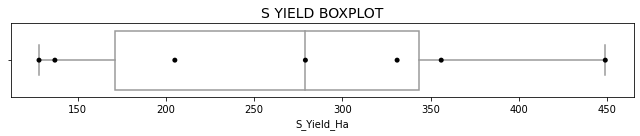

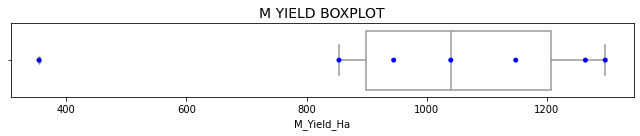

In [ ]:
#checking outliers of X dataset using boxplot and swarmplot
#unusual but normal part of the data
plt.figure(figsize=(9,2))

plot=sns.boxplot(x='S_Yield_Ha',data=X,color='white')
plot=sns.swarmplot(x='S_Yield_Ha',data=X,color='black')
plt.title('S YIELD BOXPLOT',fontsize=14)

plt.xlabel('S_Yield_Ha')
plt.tight_layout()


plt.figure(figsize=(9,2))

plot=sns.boxplot(x='M_Yield_Ha',data=X,color='white')
plot=sns.swarmplot(x='M_Yield_Ha',data=X,color='blue')

plt.title('M YIELD BOXPLOT',fontsize=14)
plt.xlabel('M_Yield_Ha')
plt.tight_layout()

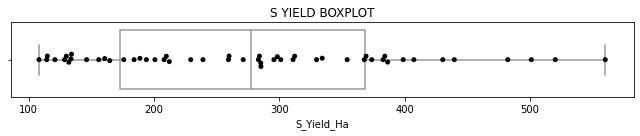

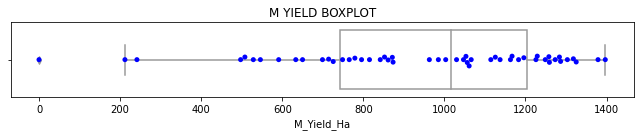

In [ ]:
#checking outliers of Y dataset using boxplot and swarmplot
#unusual but normal part of the data
plt.figure(figsize=(9,2))
plot=sns.boxplot(x='S_Yield_Ha',data=Y,color='white')
plot=sns.swarmplot(x='S_Yield_Ha',data=Y,color='black')
plt.title('S YIELD BOXPLOT',fontsize=12)
plt.xlabel('S_Yield_Ha')
plt.tight_layout()

plt.figure(figsize=(9,2))
plot=sns.boxplot(x='M_Yield_Ha',data=Y,color='white')
plot=sns.swarmplot(x='M_Yield_Ha',data=Y,color='blue')
plt.title('M YIELD BOXPLOT',fontsize=12)
plt.xlabel('M_Yield_Ha')
plt.tight_layout()

##**DATA CLEANING**

**DATA CLEANING DONE IN TABLEAU.**

An inner join is formed so as to ensure that the rows from both tables are retained.

The data Interprator is then employed to clean the new table.

##**DATA EXPLORATION AND MODELLING**

The different virtualization employed and the in-depth analysis for the data is done on tableau

##**DATA EVALUATION AND RECOMMENDATION**

**Evaluation**

*   There is a direct relationship between the area allocated for food production and the total produce. For maize, the production area increases the total output until point X, where the relationship becomes indirect. For sorghum, the concept is the same until point Y, where an increase in the area neither results in an increase nor a decrease (point of saturation).

*   Mize generally takes up less area to have bountiful produce yet has averagely higher quality produce.

*  Some regions generally do better in maize, while some do better in sorghum. 

**Recommendation**


*   Use the visual tool to work with optimum points. The point where the area of land gives maximum produce ought to be the maximum land allocated. This ensures that extra land is put to good use, i.e., the state of equilibrium is achieved.

*   Given that maize yields abundantly even on smaller hectares of land, regions with smaller pieces of land can focus on maize growing while regions with larger pieces of land can focus on sorghum. Since both crops have a high return on investment; there would be more food hence promise of more food security. 

*   The regions that are currently not production intensive ought to be studied to see what is the problem and how the narrative can change.









